In [4]:
setwd("/projects/PPC/analysis/ppc_eqtls")

source("scripts/packages.R"  )
source("scripts/functions.R" )
source("scripts/input_data.R")
source("scripts/general_plotting_functions.R")

dyn.load("/software/hdf5-1.10.4/lib/libhdf5_hl.so.100")

# Extra Analysis: Overlap of expressed genes between PPC and adult islets

Loading required package: grid

Loading required package: futile.logger



[1] 4211

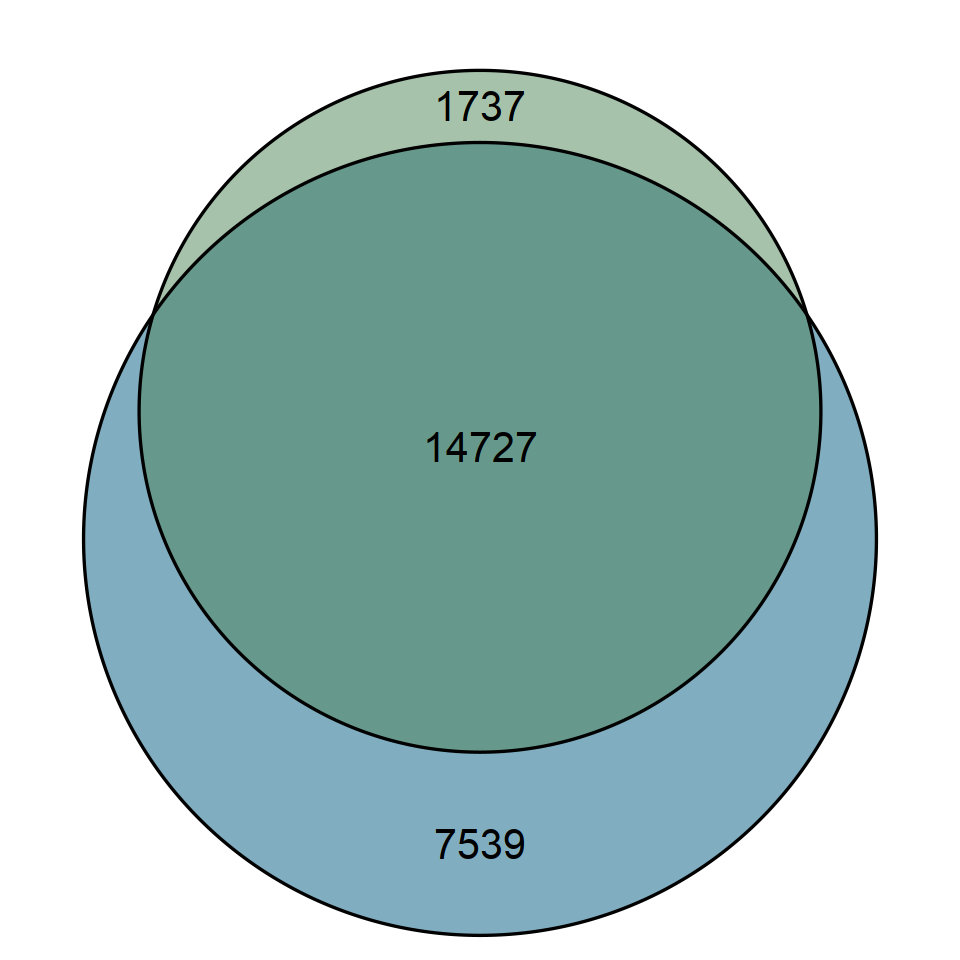

In [11]:
library(VennDiagram)

islet_egenes = readLines("input/eqtl/egene_lists/Islets.egenes.txt")
all_islets = simplify_id(readLines("input/eqtl/egene_lists/Islets_Gene_allIDs.txt"))

length(unique(intersect(islet_egenes, all_islets)))

venn = function()
{
    all_islets = simplify_id(readLines("input/eqtl/egene_lists/Islets_Gene_allIDs.txt"))
    all_ppc = fread("pipeline/3.2.eqtls/eqtls/ppc_eqtls_peer20.gene.egenes.txt") 
    all_ppc = simplify_id(all_ppc$gene_id)

    v = venn.diagram(list(Adult_Islets = all_islets, PPC = all_ppc), fill = c("#005a80", "#4d8657"), filename = NULL, 
                     alpha = c(0.5, 0.5), cat.cex = 2.5, cex=2, category.names = c("" , ""), 
                     cat.pos = c(350, 8), main.cex = 1.2, cat.fontfamily = "arial", main.fontfamily = "arial", 
                     fontfamily = "arial", rotation.degree = 90)

    return(v)
#     return(plot_grid(v, labels = "A", label_size = 33))
}

psize(w = 8, h = 8)
plot_grid(venn())

# Extra analysis: Overlap of expressed eGenes in PPC and adult islets

In [17]:
# 1. Get genes that were expressed in both PPC and adult islets
all_islets = simplify_id(readLines("input/eqtl/egene_lists/Islets_Gene_allIDs.txt"))
all_ppc = fread("pipeline/3.2.eqtls/eqtls/ppc_eqtls_peer20.gene.egenes.txt") 
all_ppc = simplify_id(all_ppc$gene_id)

both = intersect(all_islets, all_ppc)

message(paste("# expressed genes in both PPC and adult islets:", length(unique(both))))

# expressed genes in both PPC and adult islets: 14727



3301



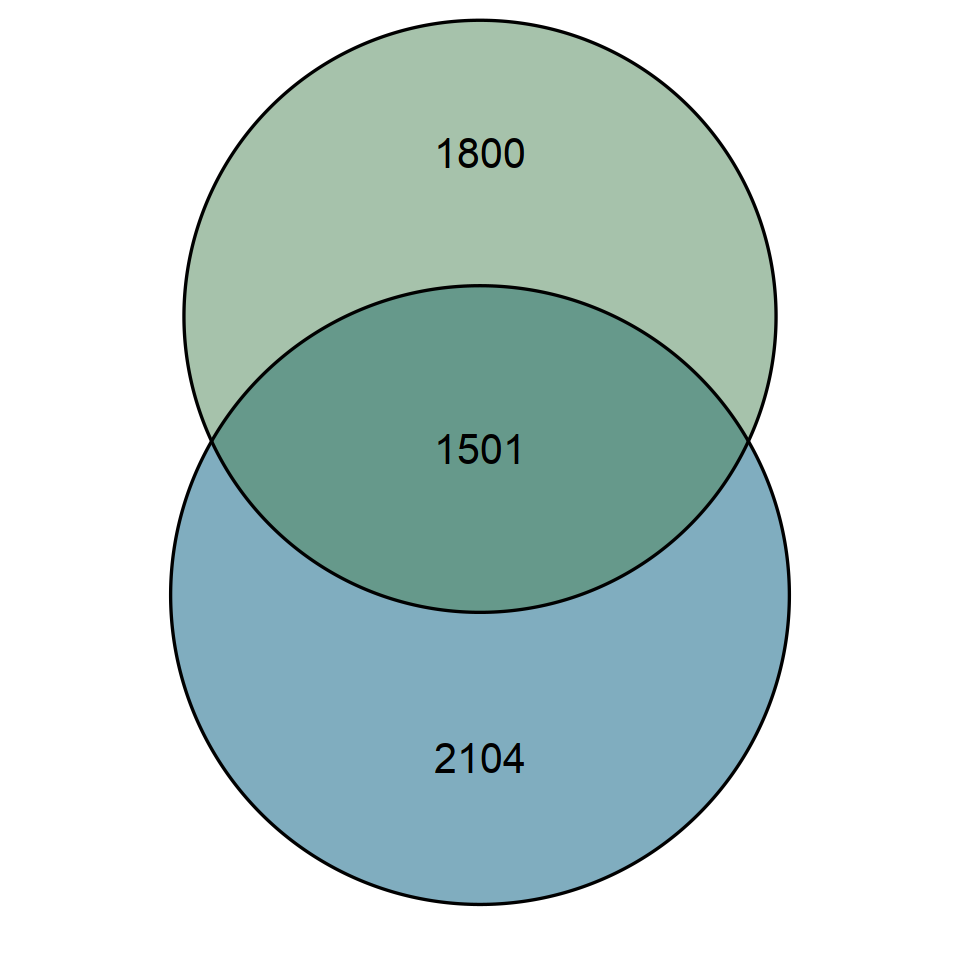

In [21]:
islet_egenes = readLines("input/eqtl/egene_lists/Islets.egenes.txt")
all_islets = simplify_id(readLines("input/eqtl/egene_lists/Islets_Gene_allIDs.txt"))

venn = function()
{
    islet_egenes = readLines("input/eqtl/egene_lists/Islets.egenes.txt")
    all_islets = simplify_id(readLines("input/eqtl/egene_lists/Islets_Gene_allIDs.txt"))
    islet_egenes = intersect(both, unique(intersect(islet_egenes, all_islets))) # expressed islet egenes
    message(length(unique(islet_egenes)))
    ppc_egenes = fread("pipeline/3.2.eqtls/eqtls/ppc_eqtls_peer20.gene.egenes.txt") %>% filter(egene == T)
    ppc_egenes = intersect(both, simplify_id(ppc_egenes$gene_id))

    v = venn.diagram(list(Adult_Islets = islet_egenes, PPC = ppc_egenes), fill = rev(c("#005a80", "#4d8657")), filename = NULL, 
                     alpha = c(0.5, 0.5), cat.cex = 2.5, cex=2, category.names = c("" , ""), 
                     cat.pos = c(350, 8), main.cex = 1.2, cat.fontfamily = "arial", main.fontfamily = "arial", 
                     fontfamily = "arial", rotation.degree = 90)

    return(v)
#     return(plot_grid(v, labels = "A", label_size = 33))
}

psize(w = 8, h = 8)
plot_grid(venn())

# Figure 2A: Overlap between all eGenes

# eGenes in adult islets: 4211 4211



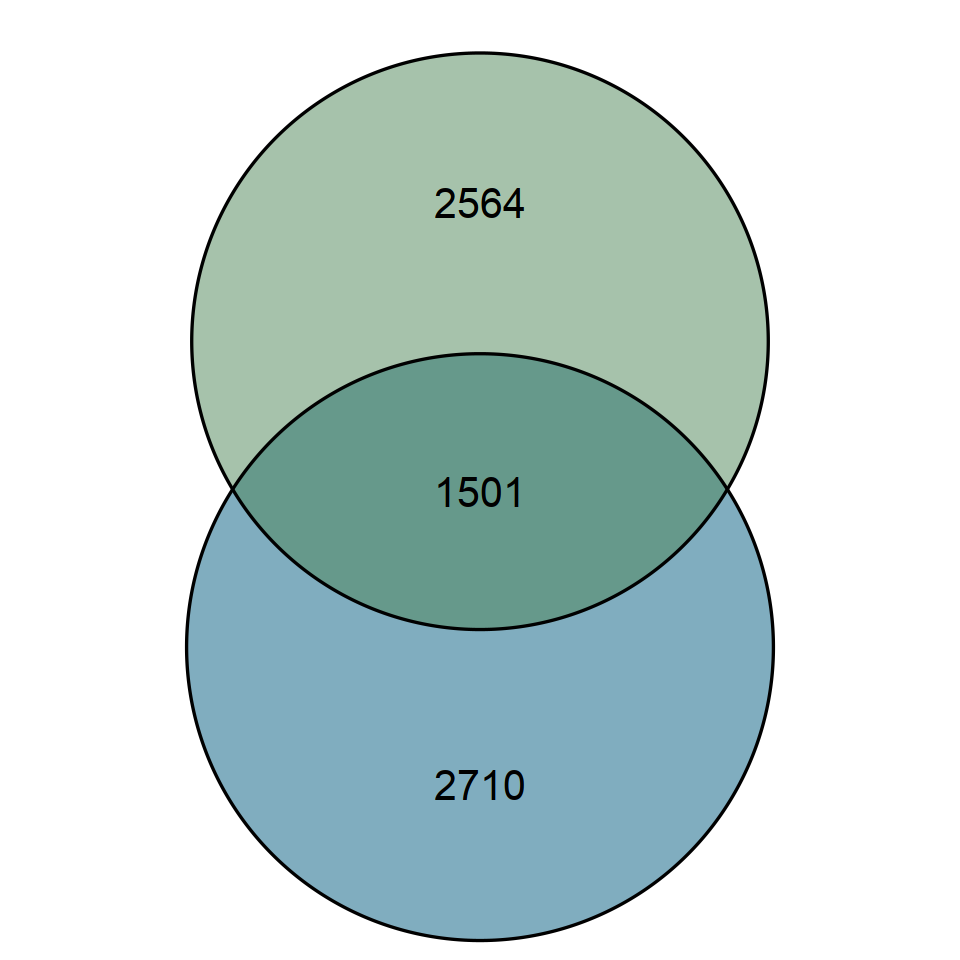

In [25]:
library(VennDiagram)

islet_egenes = readLines("input/eqtl/egene_lists/Islets.egenes.txt")
all_islets = simplify_id(readLines("input/eqtl/egene_lists/Islets_Gene_allIDs.txt"))

message(paste("# eGenes in adult islets:", length(unique(intersect(islet_egenes, all_islets))), length(unique(islet_egenes)) ))

venn = function()
{
    islet_egenes = readLines("input/eqtl/egene_lists/Islets.egenes.txt")
    all_islets = simplify_id(readLines("input/eqtl/egene_lists/Islets_Gene_allIDs.txt"))
    islet_egenes = unique(intersect(islet_egenes, all_islets))
    ppc_egenes = fread("pipeline/3.2.eqtls/eqtls/ppc_eqtls_peer20.gene.egenes.txt") %>% filter(egene == T)
    ppc_egenes = simplify_id(ppc_egenes$gene_id)

    v = venn.diagram(list(Adult_Islets = islet_egenes, PPC = ppc_egenes), fill = c("#005a80", "#4d8657"), filename = NULL, 
                     alpha = c(0.5, 0.5), cat.cex = 2.5, cex=2, category.names = c("" , ""), 
                     cat.pos = c(350, 8), main.cex = 1.2, cat.fontfamily = "arial", main.fontfamily = "arial", 
                     fontfamily = "arial", rotation.degree = 90)

    return(v)
#     return(plot_grid(v, labels = "A", label_size = 33))
}

psize(w = 8, h = 8)
plot_grid(venn())

# Figure 2B

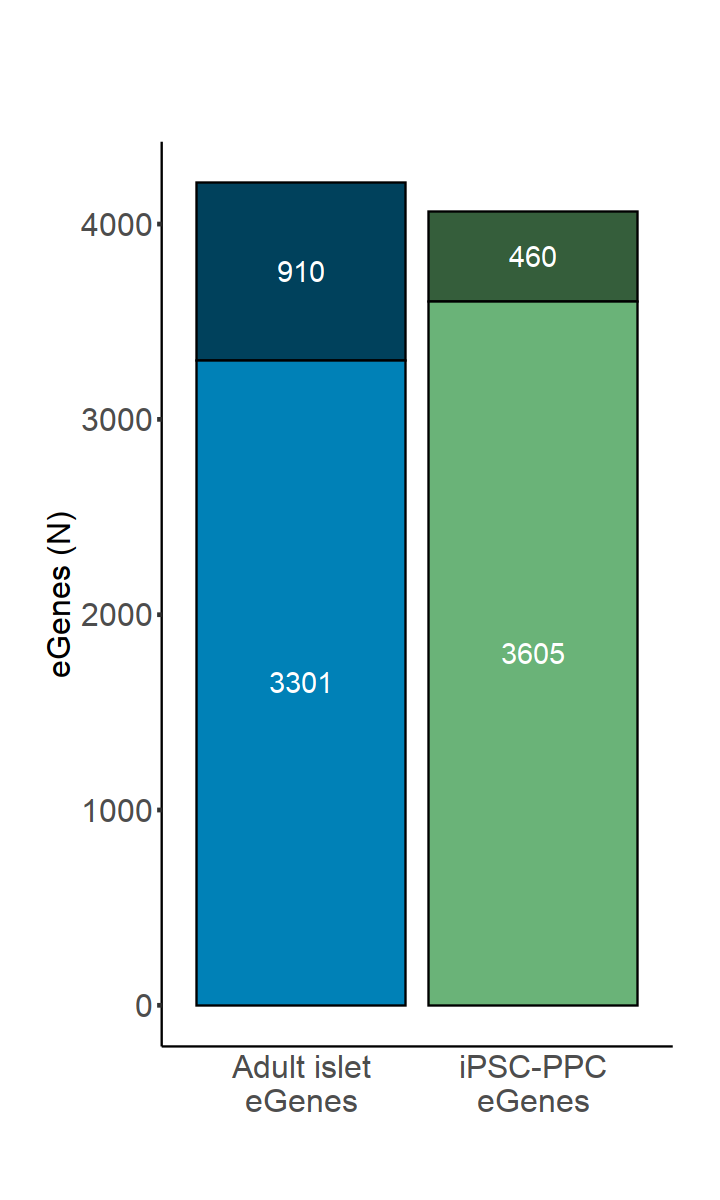

In [29]:
bar_exp = function()
{
    geneinfo = fread("pipeline/1.2.expression/gene_info.txt", data.table = F)
    geneinfo$gene_id = simplify_id(geneinfo$gene_id)

    all_islet_egenes = simplify_id(readLines("input/eqtl/egene_lists/Islets_Gene_allIDs.txt"))
    islet_egenes = readLines("input/eqtl/egene_lists/Islets.egenes.txt")
    ppc_egenes = fread("pipeline/3.2.eqtls/eqtls/ppc_eqtls_peer20.gene.egenes.txt") %>% dplyr::filter(egene == T)
    ppc_egenes = simplify_id(ppc_egenes$gene_id)

    tobar = data.frame(class = c("adult", "adult", "ppc", "ppc", "shared"),
               group = c("Not expressed in other tissue   ", 
                         "Expressed in other tissue   ", 
                         "Not expressed in adult islets", 
                         "Expressed in adult islets", 
                         "Both"),
               value = c(length(setdiff(islet_egenes, geneinfo$gene_id)),
                         length(intersect(islet_egenes, geneinfo$gene_id)),
                         length(setdiff(ppc_egenes, all_islet_egenes)),
                         length(intersect(ppc_egenes, all_islet_egenes)),
                         length(intersect(islet_egenes, ppc_egenes))))

    tobar = tobar %>% filter(group != "Both")
    tobar$group = factor(tobar$group, levels = tobar$group)
    
    ggplot(tobar, aes(x = class, y = value, fill = group, label = value)) + 
        geom_bar(stat = "identity", color = "black") + theme_classic() + 
        theme(
            axis.ticks.x = element_blank(),
            axis.ticks = element_line(size = 1),
            plot.title = element_text(hjust = 0.5, size = 18),
            axis.text = element_text(size = 19),
            axis.title = element_text(size = 19),
            legend.text = element_text(size = 16),
            plot.margin = unit(c(3,1,1,1), "cm")
        ) +
        geom_text(data = tobar, aes(x = class, y = value, label = value), position = position_stack(vjust = 0.5), size = 6, color = "white") + 
        ylab("eGenes (N)") + xlab("") + 
        scale_fill_manual(values = c("#00415c", "#0081b7", "#355e3b", "#6ab378", "#faa275"), name = "") +
        theme(legend.position = "none") + 
        guides(fill = guide_legend(nrow = 2)) + 
        scale_x_discrete(labels = c("Adult islet\neGenes", "iPSC-PPC\neGenes", "eGenes\nin both"))  
}

psize(w = 6, h = 10)
bar_exp()

# Figure 2C


different    shared 
       94       701 


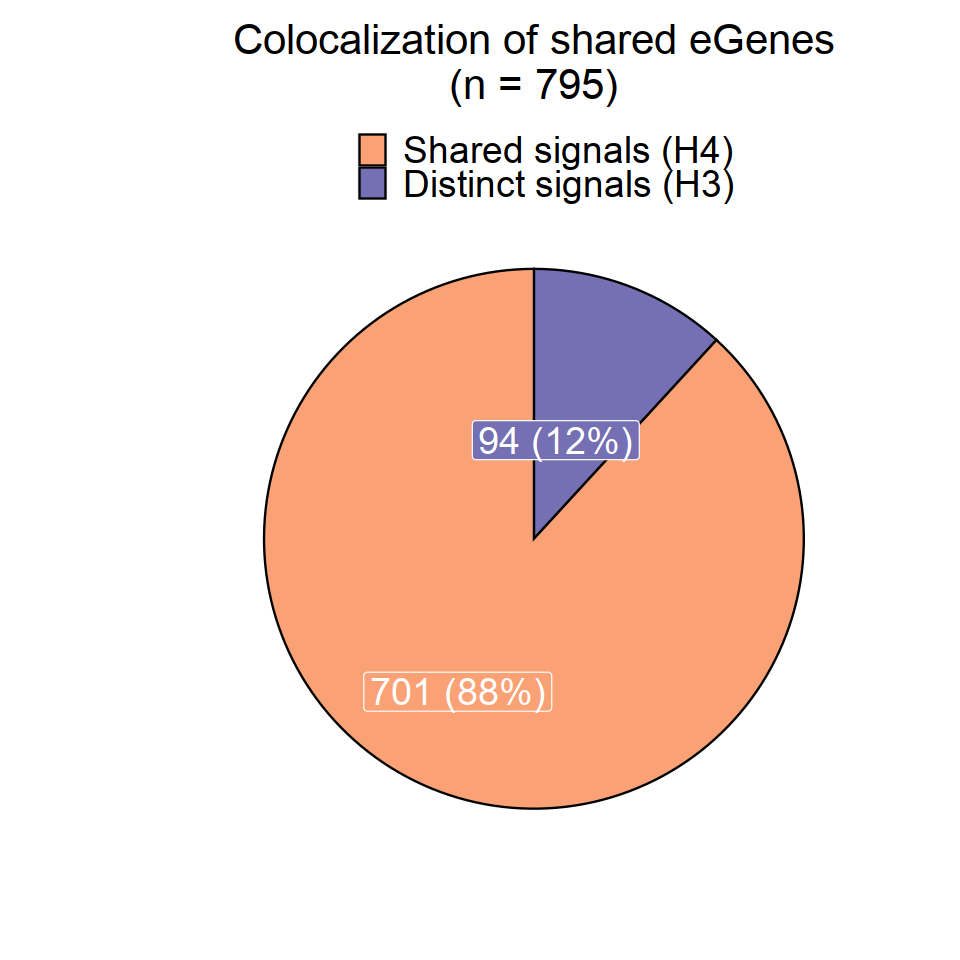

In [71]:
shared_egenes = function()
{
#     File on server
#     ppc_eqtl.gene = fread("pipeline/3.2.eqtls/eqtls/ppc_eqtls_peer20.gene.egenes.txt") %>% dplyr::filter(egene == T) %>% 
#         mutate(transcript_id = simplify_id(transcript_id)) %>% 
#         mutate(qtl_id = paste(type, transcript_id))
#     this = fread("pipeline/3.4.coloc_adult/ppc_coloc/summary/ppc_coloc.summary_pp0.8.txt", data.table = F) %>% dplyr::filter(adult == "Islets") %>%
#         mutate(qtl_id = paste(type, ppc.gene_id)) %>%
#         dplyr::filter( (PP.H4.abf >= 0.8 | PP.H3.abf >= 0.8) & nsnps >= 500 & qtl_id %in% ppc_eqtl.gene$qtl_id & adult.gene_id %in% islet_egenes) %>%
#         dplyr::filter(ppc.gene_id == adult.gene_id)
    
    ppc_eqtl.gene = fread("reviews/tables/Table_SX_LeadSNP.txt", data.table = F) %>% filter(egene == T)
    
    islet_egenes = paste("islet", "0", readLines("input/eqtl/egene_lists/Islets.egenes.txt"), sep = "_")

    coloc = fread("reviews/tables/Table_SX_PPC_Endocrine_eGene.txt", data.table = F) %>%
        filter(eqtl_id.1 %in% ppc_eqtl.gene$eqtl_id & 
               eqtl_id.2 %in% islet_egenes)
    

    same = data.frame(gene_id = unique(coloc$gene_id.1))
    same$h4 = ifelse(same$gene_id %in% coloc[coloc$likely_model %like% "H4",]$gene_id.1, T, F)
    same$h3 = ifelse(same$gene_id %in% coloc[coloc$likely_model %like% "H3",]$gene_id.1, T, F)
    same$label = ifelse(same$h4 == T, "shared", ifelse(same$h3 == T, "different", "indeterminate"))

    print(table(same$label))

    toplot = data.frame(table(same$label)) %>% dplyr::filter(Var1 != "indeterminate")
    toplot$Var1 = factor(toplot$Var1, levels = c("shared", "different"))
    toplot = toplot %>% mutate(ypos = cumsum(Freq)- 0.5*Freq )
    toplot$label = paste(toplot$Freq, paste0("(", signif(toplot$Freq / sum(toplot$Freq) * 100, 2), "%)"))

    p = ggplot(toplot, aes(x = 1, y = Freq, fill = Var1, label = label)) + 
            geom_bar(stat = "identity", color = "black") + 
            coord_polar("y", start = 0) + jn_theme +
            theme(
                axis.ticks = element_blank(),
                axis.text = element_blank(),
                panel.border = element_blank(),
                legend.position = "top",
                legend.margin = margin(0,0,0,0),
                legend.box.margin = margin(10,-10,-10,-10),
                plot.title = element_text(hjust = 0.5, size = 25),
                legend.text = element_text(size = 22)
            ) + xlab("") + ylab("") + 
            scale_fill_manual(values = c("#faa275", "#7570b3"), 
                              labels = c("Shared signals (H4)", "Distinct signals (H3)"), name = "") +
            geom_label_repel(data = toplot,aes(y = ypos, label = label),size = 8, show.legend = FALSE, color = "white") +
            ggtitle("Colocalization of shared eGenes\n(n = 795)") +
            guides(fill = guide_legend(nrow = 2))
    
    return(p)
}

psize(w = 8, h = 8)
shared_egenes()

# Figure 2C

In [73]:
run_plink = function(prefix, chrom, hit, data)
{
    vcf = paste("/frazer01/home/jennifer/references/1kg/eur_only",  paste0("chr", chrom, ".vcf.gz"), sep = "/")
    cmd = paste("plink --memory 15000 --threads 4", 
                "--vcf", vcf, 
                "--extract", paste("scratch", paste(prefix, "snp", sep = "."), sep = "/"), 
                "--keep-allele-order --r2 square --make-bed --out", paste("scratch", prefix, sep = "/"))

    message(cmd)
    system(cmd)

    bim = fread(paste("scratch", paste(prefix, "bim", sep = "."), sep = "/"), data.table = F)
    ld = fread(paste("scratch", paste(prefix, "ld", sep = "."), sep = "/"), data.table = F)

    cmd = paste("rm", paste("scratch", paste0(prefix, ".*"), sep = "/"))
    message(cmd)
    system(cmd)

    rownames(ld) = bim$V2
    colnames(ld) = bim$V2

    ld2 = suppressWarnings(melt(ld[hit,]))
    colnames(ld2) = c("snp", "LD")

    data = merge(data, ld2, by = "snp")
    
    return(data)
}

label_LD_class = function(data, hits)
{
    data$LD_class = "NULL"
    data$LD_class = ifelse(data$LD < 0.2, "[0,0.2)", data$LD_class)
    data$LD_class = ifelse(data$LD >= 0.2 & data$LD < 0.4, "[0.2,0.4)", data$LD_class)
    data$LD_class = ifelse(data$LD >= 0.4 & data$LD < 0.6, "[0.4,0.6)", data$LD_class)
    data$LD_class = ifelse(data$LD >= 0.6 & data$LD < 0.8, "[0.6,0.8)", data$LD_class)
    data$LD_class = ifelse(data$LD >= 0.8 , "[0.8,1)", data$LD_class)
    data$LD_class = ifelse(data$snp %in% hits, "Lead", data$LD_class)
    
    return(data)
}

gwas_theme = theme(axis.text = element_text(size = 16), 
                  strip.text = element_text(size = 16), 
                  axis.title = element_text(size = 16), 
                  plot.title = element_text(size = 20, hjust= 0.5),
                  legend.position = "none")


LD_class = c("[0,0.2)", "[0.2,0.4)", "[0.4,0.6)", "[0.6,0.8)", "[0.8,1)", "Lead")
my_cols = list("iPSC-PPC" = "#336666", "Islets" = "#4e7da1", "Pancreas" = "#f5c164", "GWAS" = "#999999")

col_list = lapply(names(my_cols), function(x) 
{ 
    message(paste(x, my_cols[[x]]), appendLF = F)
    colfunc = colorRampPalette(c("#c5c5c5", my_cols[[x]], my_cols[[x]]))
    cols = as.list(colfunc(6))
    names(cols) = LD_class
    return(cols)
})

names(col_list) = names(my_cols)

ld_cols = as.list(c("#1f315b", "#52cadc", "#72d373", "#f9a606", "#e11b1b", "#7752d4"))
names(ld_cols) = LD_class


iPSC-PPC #336666
Islets #4e7da1
Pancreas #f5c164
GWAS #999999


In [74]:
qtl_id1 = "0_ENSG00000048471"
qtl_id2 = "Islets_ENSG00000048471"

dir = "pipeline/3.4.coloc_adult/susie_coloc/susie_rss.new"
file1 = paste(dir, paste(gsub(" ", "_", qtl_id1), "robj", sep = "."), sep = "/")
file2 = paste(dir, paste(gsub(" ", "_", qtl_id2), "robj", sep = "."), sep = "/")

tiss1 = ifelse(qtl_id1 %like% "Islets", "Islets", ifelse(qtl_id1 %like% "Pancreas", "Pancreas", "iPSC-PPC"))
tiss2 = ifelse(qtl_id2 %like% "Islets", "Islets", ifelse(qtl_id2 %like% "Pancreas", "Pancreas", "iPSC-PPC"))

load(file1, verbose = T)
dataset1 = dataset
load(file2, verbose = T)
dataset2 = dataset

Loading objects:
  dataset
Loading objects:
  dataset


In [ ]:
# 1. Get eQTL p-value associations
qtl1 = data.frame(pval = dataset1$pval, snp = dataset1$snp) %>% mutate(tissue = tiss1) %>% mutate(pos = unlist(lapply(snp, function(x) { as.numeric(unlist(strsplit(x, "_"))[2]) })))
qtl2 = data.frame(pval = dataset2$pval, snp = dataset2$snp) %>% mutate(tissue = tiss2) %>% mutate(pos = unlist(lapply(snp, function(x) { as.numeric(unlist(strsplit(x, "_"))[2]) })))

# 2. Get lead variants
hit1 = qtl1 %>% arrange(pval) %>% head(1) %>% pull(snp)
hit2 = qtl2 %>% arrange(pval) %>% head(1) %>% pull(snp)

hit1
hit2

# 3. Label and write list of SNPs for plink
qtl1 = qtl1 %>% mutate(tolabel = ifelse(snp %in% c(hit1, hit2), T, F)) %>% filter(pos %in% intersect(qtl1$pos, qtl2$pos))
qtl2 = qtl2 %>% mutate(tolabel = ifelse(snp %in% c(hit1, hit2), T, F)) %>% filter(pos %in% intersect(qtl1$pos, qtl2$pos))

writeLines(unique(qtl1$snp), paste("scratch", paste(qtl_id1, "snp", sep = "."), sep = "/"), sep = "\n")
writeLines(unique(qtl2$snp), paste("scratch", paste(qtl_id2, "snp", sep = "."), sep = "/"), sep = "\n")

# 4. Run Plink
message(paste("Running LD:", nrow(qtl1), qtl_id1))
message(paste("Running LD:", nrow(qtl2), qtl_id2))

chrom = unlist(strsplit(qtl1$snp, "_"))[1]
qtl1_toplot = run_plink(qtl_id1, chrom, hit1, qtl1)
qtl2_toplot = run_plink(qtl_id2, chrom, hit2, qtl2)

message(paste("Plotting:", nrow(qtl1_toplot), qtl_id1), appendLF = F)
message(paste("Plotting:", nrow(qtl2_toplot), qtl_id2), appendLF = F)

# 5. Label SNPs with color based on LD
qtl2_toplot$color_cat = ifelse(qtl2_toplot$tissue == "iPSC-PPC", "iPSC-PPC", ifelse(qtl2_toplot$tissue == "Islets", "Islets", "Pancreas"))
qtl1_toplot$color_cat = ifelse(qtl1_toplot$tissue == "iPSC-PPC", "iPSC-PPC", ifelse(qtl1_toplot$tissue == "Islets", "Islets", "Pancreas"))

qtl1_toplot = label_LD_class(qtl1_toplot, c(hit1, hit2))
qtl2_toplot = label_LD_class(qtl2_toplot, c(hit1, hit2))

qtl1_toplot$color_id = suppressWarnings(mapvalues(qtl1_toplot$LD_class, names(col_list[["iPSC-PPC"]]), as.vector(unlist(col_list[["iPSC-PPC"]]))))
qtl2_toplot$color_id = suppressWarnings(mapvalues(qtl2_toplot$LD_class, names(col_list[["Islets"]]), as.vector(unlist(col_list[["Islets"]]))))


In [7]:
# toplot_list = list(qtl1_toplot, qtl2_toplot)
# save(toplot_list, file = "reviews/figures/snx29.robj")

In [76]:
# Genome-wide significant line (0.05 / number of independent SNPs calculated by eigenMT)
eqtl = fread("pipeline/3.2.eqtls/eqtls/ppc_eqtls_peer20.gene.egenes.txt", data.table = F)
a = eqtl %>% filter(gene_name %like% "SNX29" & type == 0)
0.05 / a$tests


[1] 1.179802e-05

In [77]:
12656135 - 12136526

[1] 519609

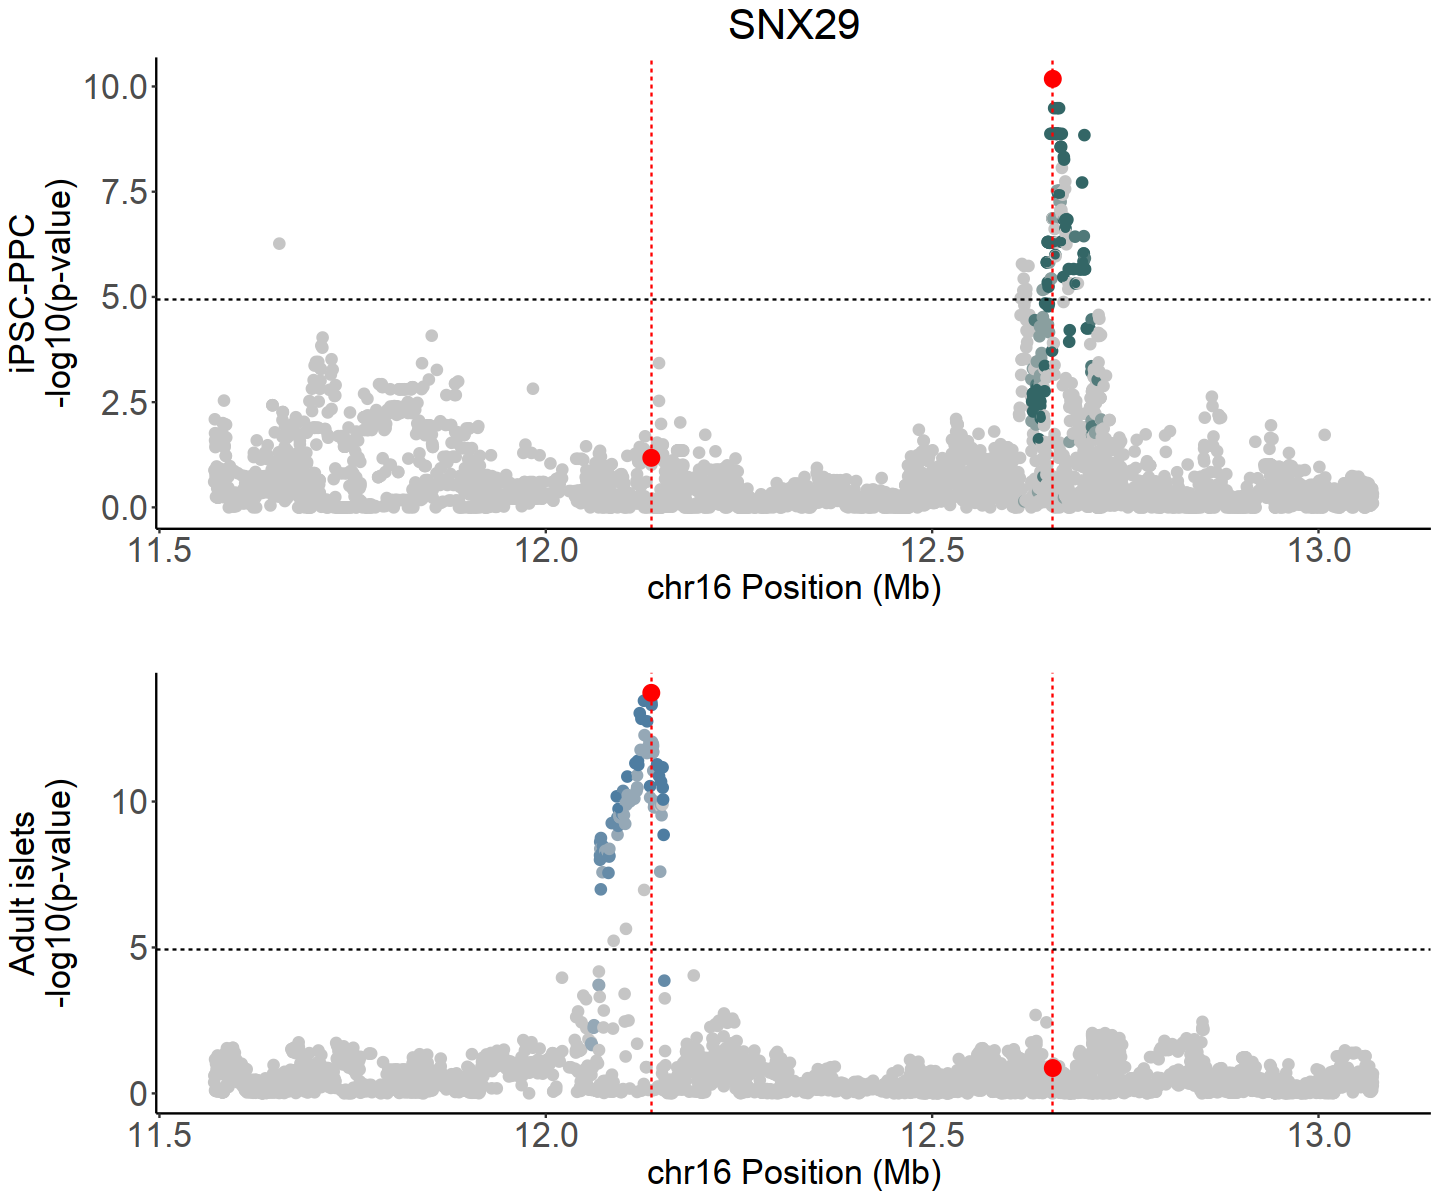

In [13]:
snx29 = function()
{
    chrom = 16
    hit1 = '16_12656135_C_G'
    hit2 = '16_12136526_A_G' 
    load("reviews/figures/snx29.robj")
    qtl1_toplot = toplot_list[[1]]
    qtl2_toplot = toplot_list[[2]]
    
    p1 = ggplot(qtl1_toplot, aes(x = pos/1e6, y = -log10(pval), color = color_id)) + 
        scale_color_identity() + geom_point(size = 2.5) + theme_classic() + 
        geom_point(data = qtl1_toplot %>% filter(LD > 0.6)) +
        geom_point(data = qtl1_toplot %>% filter(LD > 0.8)) +
        ylab("iPSC-PPC\n-log10(p-value)") + 
        xlab(paste(paste0("chr", chrom), "Position (Mb)")) + gwas_theme + 
        geom_vline(xintercept = unlist(lapply(c(hit1, hit2), function(x) { as.numeric(unlist(strsplit(x, "_"))[2]) / 1e6 })), linetype = "dashed", color = "red") +
        geom_point(data = qtl1_toplot %>% filter(tolabel == T), color = "red", size = 4) + 
        geom_hline(yintercept = -log10(1.17980179329873e-05), linetype = "dashed") +
        theme(plot.title = element_text(size = 25), axis.text = element_text(size = 20), axis.title = element_text(size = 20)) + 
        ggtitle("SNX29")


    p2 = ggplot(qtl2_toplot, aes(x = pos/1e6, y = -log10(pval), color = color_id)) + 
        scale_color_identity() + geom_point(size = 2.5) + theme_classic() + 
        geom_point(data = qtl2_toplot %>% filter(LD > 0.6)) +
        geom_point(data = qtl2_toplot %>% filter(LD > 0.8)) +
        ylab("Adult islets\n-log10(p-value)") + 
        xlab(paste(paste0("chr", chrom), "Position (Mb)")) + gwas_theme +
        geom_vline(xintercept = unlist(lapply(c(hit1, hit2), function(x) { as.numeric(unlist(strsplit(x, "_"))[2]) / 1e6 })), linetype = "dashed", color = "red")  +
        geom_point(data = qtl2_toplot %>% filter(tolabel == T), color = "red", size = 4) + 
        geom_hline(yintercept = -log10(1.17980179329873e-05), linetype = "dashed") +
        theme(axis.text = element_text(size = 20), axis.title = element_text(size = 20))


    plot_grid(p1, p2, ncol = 1, align = "hv", rel_heights = c(1, 0.95))
}

psize(w = 12, h = 10)
snx29()

In [14]:
psize(w = 22, h = 8)
png("reviews/figures/figure2_R.png", width = 11000, height = 3700, res = 400)
plot_grid(NULL, bar_exp(), shared_egenes(), snx29(), labels = c("a", "b", "c", "d"), label_size = 33, nrow = 1, rel_widths = c(0.6, 0.6, 0.8, 0.8))
dev.off()

[1] 795


png 
  2